In [1]:
# get diff vector using some really reasonable nodules
# import things
import os
import os.path as osp
import sys
import torch
import numpy as np

/labs/gevaertlab/users/yyhhli/miniconda3/envs/lungvae38/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
sys.path.insert(1, '/labs/gevaertlab/users/yyhhli/code/vae/')

In [15]:
# import datasets

from datasets import PATCH_DATASETS
from datasets.utils import sitk2tensor
lidc_train = PATCH_DATASETS['LIDCPatchAugDataset'](
    root_dir=None, transform=sitk2tensor, split='train')
lidc_val = PATCH_DATASETS['LIDCPatchAugDataset'](
    root_dir=None, transform=sitk2tensor, split='val')
# get dataloaders
from torch.utils.data.dataloader import DataLoader
lidc_train_dataloader = DataLoader(
    dataset=lidc_train, batch_size=36, shuffle=False, drop_last=False, num_workers=4, pin_memory=False)
lidc_val_dataloader = DataLoader(
    dataset=lidc_val, batch_size=36, shuffle=False, drop_last=False, num_workers=4, pin_memory=False)

# import LNDB dataset
lndb_train = PATCH_DATASETS['LNDbPatch32Dataset'](
    root_dir=None, transform=sitk2tensor, split='train')
lndb_val = PATCH_DATASETS['LNDbPatch32Dataset'](
    root_dir=None, transform=sitk2tensor, split='val')
# lndb dataloader
lndb_train_dataloader = DataLoader(
    dataset=lndb_train, batch_size=36, shuffle=False, drop_last=False, num_workers=4, pin_memory=False)
lndb_val_dataloader = DataLoader(
    dataset=lndb_val, batch_size=36, shuffle=False, drop_last=False, num_workers=4, pin_memory=False)

# import stf dataset and dataloader
stf_train = PATCH_DATASETS['StanfordRadiogenomicsPatchDataset'](
    root_dir=None, transform=sitk2tensor, split='train')
stf_val = PATCH_DATASETS['StanfordRadiogenomicsPatchDataset'](
    root_dir=None, transform=sitk2tensor, split='val')
# stf dataloader
stf_train_dataloader = DataLoader(
    dataset=stf_train, batch_size=36, shuffle=False, drop_last=False, num_workers=4, pin_memory=False)
stf_val_dataloader = DataLoader(
    dataset=stf_val, batch_size=36, shuffle=False, drop_last=False, num_workers=4, pin_memory=False)



[06-02 14:49:14 | patch_ds:LIDCPatchAugDataset] patient split: train:699, val:88, test:88
[06-02 14:49:14 | patch_ds:LIDCPatchAugDataset] patch split: train, 32694
[06-02 14:49:15 | patch_ds:LIDCPatchAugDataset] patient split: train:699, val:88, test:88
[06-02 14:49:15 | patch_ds:LIDCPatchAugDataset] patch split: val, 4194
[06-02 14:49:15 | patch_ds:LNDbPatch32Dataset] patient split: train:168, val:22, test:22
[06-02 14:49:15 | patch_ds:LNDbPatch32Dataset] patch split: train, 844
[06-02 14:49:15 | patch_ds:LNDbPatch32Dataset] patient split: train:168, val:22, test:22
[06-02 14:49:15 | patch_ds:LNDbPatch32Dataset] patch split: val, 97
[06-02 14:49:15 | patch_stanfordradiogenomics:StanfordRadiogenomicsPatchDataset] patient split: train:100, test:43
[06-02 14:49:15 | patch_stanfordradiogenomics:StanfordRadiogenomicsPatchDataset] this dataset only has train/test splits, setting val as test
[06-02 14:49:15 | patch_stanfordradiogenomics:StanfordRadiogenomicsPatchDataset] patient split: train

In [5]:
log_name="VAE3D32AUG"
version=70
vis_dir="/labs/gevaertlab/users/yyhhli/code/vae/EDA/image_synthesize_experiment/results/"

In [ ]:
# import exporter
# from evaluations.export import Exporter
# lidc_exporter = Exporter(log_name=log_name, version=version,
#                     dataloaders={"train": lidc_train_dataloader,
#                                     "val": lidc_val_dataloader},
#                     task_names=["volume"])
# # get data
# embeddings, data_names, label_dict = lidc_exporter.get_data()
# embeddings_train = np.array(embeddings["train"])

In [42]:
from evaluations.export import Exporter
lndb_exporter = Exporter(log_name=log_name, version=version,
                    dataloaders={"train": lndb_train_dataloader,
                                    "val": lndb_val_dataloader},
                    task_names=["LNDbTaskVolume"])
# get data
lndb_embeddings, data_names, lndb_label_dict = lndb_exporter.get_data()
lndb_embeddings_train = np.array(lndb_embeddings["train"])

[06-02 15:04:37 | patch_ds:LIDCPatchAugDataset] patient split: train:699, val:88, test:88
[06-02 15:04:37 | patch_ds:LIDCPatchAugDataset] patch split: train, 32694
[06-02 15:04:37 | patch_ds:LNDbPatch32AugDataset] patient split: train:168, val:22, test:22
[06-02 15:04:37 | patch_ds:LNDbPatch32AugDataset] patch split: train, 5064
[06-02 15:04:37 | patch_stanfordradiogenomics:StanfordRadiogenomicsPatchAugDataset] patient split: train:100, test:43
[06-02 15:04:37 | export:  Exporter] initializing embeddings
[06-02 15:04:41 | patch_ds:LIDCPatchAugDataset] patient split: train:699, val:88, test:88
[06-02 15:04:41 | patch_ds:LIDCPatchAugDataset] patch split: train, 32694
[06-02 15:04:41 | patch_ds:LNDbPatch32AugDataset] patient split: train:168, val:22, test:22
[06-02 15:04:41 | patch_ds:LNDbPatch32AugDataset] patch split: train, 5064
[06-02 15:04:41 | patch_stanfordradiogenomics:StanfordRadiogenomicsPatchAugDataset] patient split: train:100, test:43


 | 5.0 secs.


In [43]:
lndb_volume = np.array(lndb_label_dict['LNDbTaskVolume']['train'])

In [13]:
np.median(lndb_volume)

216.8279484561208

Text(0.5, 1.0, 'LNDb Volume Histogram')

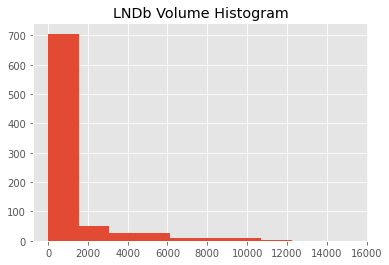

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(lndb_volume)
plt.title("LNDb Volume Histogram")

In [16]:
lidc_exporter = Exporter(log_name=log_name, version=version,
                    dataloaders={"train": lidc_train_dataloader,
                                    "val": lidc_val_dataloader},
                    task_names=["volume"])
# get data
lidc_embeddings, data_names, lidc_label_dict = lidc_exporter.get_data()
lidc_embeddings_train = np.array(lidc_embeddings["train"])

[06-02 14:49:21 | patch_ds:LIDCPatchAugDataset] patient split: train:699, val:88, test:88
[06-02 14:49:21 | patch_ds:LIDCPatchAugDataset] patch split: train, 32694
[06-02 14:49:21 | patch_ds:LNDbPatch32AugDataset] patient split: train:168, val:22, test:22
[06-02 14:49:21 | patch_ds:LNDbPatch32AugDataset] patch split: train, 5064
[06-02 14:49:21 | patch_stanfordradiogenomics:StanfordRadiogenomicsPatchAugDataset] patient split: train:100, test:43
[06-02 14:49:21 | export:  Exporter] initializing embeddings
[06-02 14:49:25 | patch_ds:LIDCPatchAugDataset] patient split: train:699, val:88, test:88
[06-02 14:49:25 | patch_ds:LIDCPatchAugDataset] patch split: train, 32694
[06-02 14:49:26 | patch_ds:LNDbPatch32AugDataset] patient split: train:168, val:22, test:22
[06-02 14:49:26 | patch_ds:LNDbPatch32AugDataset] patch split: train, 5064
[06-02 14:49:26 | patch_stanfordradiogenomics:StanfordRadiogenomicsPatchAugDataset] patient split: train:100, test:43


 | 42.0 secs.


In [17]:
lidc_volume = np.array(lidc_label_dict['volume']['train'])
np.median(lidc_volume)

158.7219238281249

Text(0.5, 1.0, 'LIDC Volume Histogram')

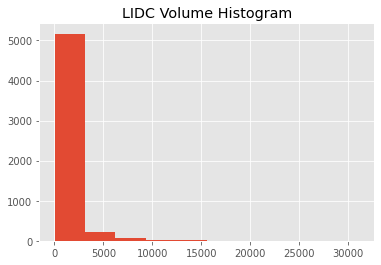

In [20]:
plt.hist(lidc_volume)
plt.title("LIDC Volume Histogram")

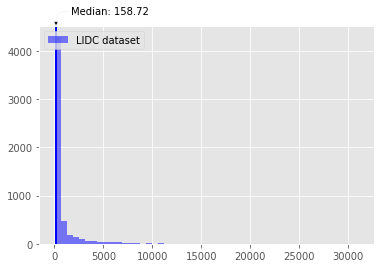

In [38]:
data1 = lidc_volume
# data2 = lndb_volume
# data3 = stf_volume
fig, ax = plt.subplots()


ax.hist(data1, bins=50, color='blue', label='LIDC dataset',
        alpha=0.5, histtype='stepfilled')
# ax.hist(data2, color='green', label='Dataset 2',
#         alpha=0.5, histtype='stepfilled')
# ax.hist(data3, color='red', label='Dataset 3',
#         alpha=0.5, histtype='stepfilled')

ax.axvline(np.median(data1), color='blue', linewidth=2)
# ax.axvline(data2.mean(), color='green', linewidth=2)
# ax.axvline(data3.mean(), color='green', linewidth=2)

# Add arrows annotating the means:
for dat, xoff in zip([data1], [15]):
    x0 = np.median(dat)
    align = 'left' if xoff > 0 else 'right'
    ax.annotate('Median: {:0.2f}'.format(x0), xy=(x0, 1), xytext=(xoff, 15),
            xycoords=('data', 'axes fraction'), textcoords='offset points',
            horizontalalignment=align, verticalalignment='center',
            arrowprops=dict(arrowstyle='-|>', fc='black', shrinkA=0, shrinkB=0,
                            connectionstyle='angle,angleA=0,angleB=90,rad=10'),
            )

ax.legend(loc='upper left')
ax.margins(0.05)
plt.show()

In [21]:
stf_exporter = Exporter(log_name=log_name, version=version,
                    dataloaders={"train": stf_train_dataloader,
                                    "val": stf_val_dataloader},
                    task_names=["StfVolume"])
# get data
stf_embeddings, data_names, stf_label_dict = stf_exporter.get_data()
stf_embeddings_train = np.array(stf_embeddings["train"])

[06-02 14:53:07 | patch_ds:LIDCPatchAugDataset] patient split: train:699, val:88, test:88
[06-02 14:53:07 | patch_ds:LIDCPatchAugDataset] patch split: train, 32694
[06-02 14:53:07 | patch_ds:LNDbPatch32AugDataset] patient split: train:168, val:22, test:22
[06-02 14:53:07 | patch_ds:LNDbPatch32AugDataset] patch split: train, 5064
[06-02 14:53:07 | patch_stanfordradiogenomics:StanfordRadiogenomicsPatchAugDataset] patient split: train:100, test:43
[06-02 14:53:07 | export:  Exporter] initializing embeddings
[06-02 14:53:11 | patch_ds:LIDCPatchAugDataset] patient split: train:699, val:88, test:88
[06-02 14:53:11 | patch_ds:LIDCPatchAugDataset] patch split: train, 32694
[06-02 14:53:11 | patch_ds:LNDbPatch32AugDataset] patient split: train:168, val:22, test:22
[06-02 14:53:11 | patch_ds:LNDbPatch32AugDataset] patch split: train, 5064
[06-02 14:53:11 | patch_stanfordradiogenomics:StanfordRadiogenomicsPatchAugDataset] patient split: train:100, test:43


 | 4.0 secs.


In [22]:
stf_volume = np.array(stf_label_dict['StfVolume']['train'])
np.median(stf_volume)

12396.5

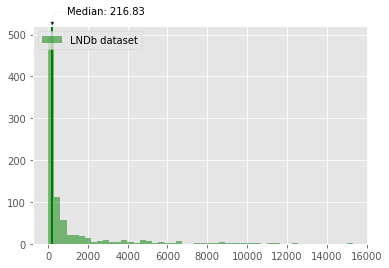

In [40]:
data1 = lndb_volume
# data2 = lndb_volume
# data3 = stf_volume
fig, ax = plt.subplots()


ax.hist(data1, bins=50, color='green', label='LNDb dataset',
        alpha=0.5, histtype='stepfilled')
# ax.hist(data2, color='green', label='Dataset 2',
#         alpha=0.5, histtype='stepfilled')
# ax.hist(data3, color='red', label='Dataset 3',
#         alpha=0.5, histtype='stepfilled')

ax.axvline(np.median(data1), color='green', linewidth=2)
# ax.axvline(data2.mean(), color='green', linewidth=2)
# ax.axvline(data3.mean(), color='green', linewidth=2)

# Add arrows annotating the means:
for dat, xoff in zip([data1], [15]):
    x0 = np.median(dat)
    align = 'left' if xoff > 0 else 'right'
    ax.annotate('Median: {:0.2f}'.format(x0), xy=(x0, 1), xytext=(xoff, 15),
            xycoords=('data', 'axes fraction'), textcoords='offset points',
            horizontalalignment=align, verticalalignment='center',
            arrowprops=dict(arrowstyle='-|>', fc='black', shrinkA=0, shrinkB=0,
                            connectionstyle='angle,angleA=0,angleB=90,rad=10'),
            )

ax.legend(loc='upper left')
ax.margins(0.05)
plt.show()

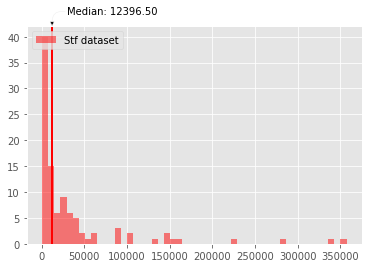

In [41]:
data1 = stf_volume
# data2 = lndb_volume
# data3 = stf_volume
fig, ax = plt.subplots()


ax.hist(data1, bins=50, color='red', label='Stf dataset',
        alpha=0.5, histtype='stepfilled')
# ax.hist(data2, color='green', label='Dataset 2',
#         alpha=0.5, histtype='stepfilled')
# ax.hist(data3, color='red', label='Dataset 3',
#         alpha=0.5, histtype='stepfilled')

ax.axvline(np.median(data1), color='red', linewidth=2)
# ax.axvline(data2.mean(), color='green', linewidth=2)
# ax.axvline(data3.mean(), color='green', linewidth=2)

# Add arrows annotating the means:
for dat, xoff in zip([data1], [15]):
    x0 = np.median(dat)
    align = 'left' if xoff > 0 else 'right'
    ax.annotate('Median: {:0.2f}'.format(x0), xy=(x0, 1), xytext=(xoff, 15),
            xycoords=('data', 'axes fraction'), textcoords='offset points',
            horizontalalignment=align, verticalalignment='center',
            arrowprops=dict(arrowstyle='-|>', fc='black', shrinkA=0, shrinkB=0,
                            connectionstyle='angle,angleA=0,angleB=90,rad=10'),
            )

ax.legend(loc='upper left')
ax.margins(0.05)
plt.show()

In [48]:
# select 36 nodules of lndb at the 75% volume and visualize
lndb_idx = np.where(lndb_volume > np.percentile(lndb_volume, 75))[0][:36]
# get images from dataset
lndb_imgs = [lndb_train[i] for i in lndb_idx]

In [49]:
len(lndb_imgs)

36